<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/DimensionalityReduction_SVD_Application_dataReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Singular Value Decomposition

SVD is basically a matrix factorization technique, which decomposes any matrix into 3 generic and familiar matrices. It has some cool applications in Machine Learning and Image Processing. To understand the concept of Singular Value Decomposition the knowledge on eigenvalues and eigenvectors is essential.

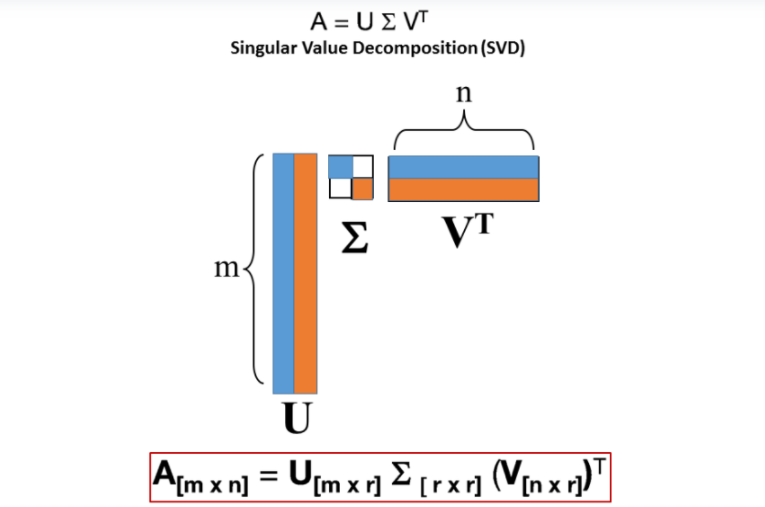

To reduce dimensionality of data - diabetes data

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x=df.drop(columns='Outcome')
y=df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

##Apply Truncates SVD

In [4]:
svd=TruncatedSVD()
xtrain=svd.fit_transform(xtrain)
xtest=svd.fit_transform(xtest)

In [5]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

print("Accuracy : ",accuracy_score(ytest,ypred))

Accuracy :  0.7597402597402597


##Create pipeline to get accuracy for different components

In [6]:
components=list(range(2,x.shape[1]))
components

[2, 3, 4, 5, 6, 7]

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

for i in components:
  model = Pipeline([("SVD",TruncatedSVD(n_components=i)),
                  ("Logistic Regression",LogisticRegression())])
  model_fit=model.fit(xtrain,ytrain)
  ypred=model_fit.predict(xtest)
  print("Accuracy for component {} is {} ".format(i,accuracy_score(ytest,ypred)))

Accuracy for component 2 is 0.7727272727272727 
Accuracy for component 3 is 0.7532467532467533 
Accuracy for component 4 is 0.7402597402597403 
Accuracy for component 5 is 0.7597402597402597 
Accuracy for component 6 is 0.7987012987012987 
Accuracy for component 7 is 0.8116883116883117 
